# Predicting Percentage of Salary Cap of NBA Players with Lasso Regression

by: Tristan Dewing

## **Importing Packages and Dataset**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
url = 'https://raw.githubusercontent.com/cmhamakawa/Data_Science_NBA_Project/master/Datasets/preprocessed_nba_dataset(w_years_of_exp).csv'
adv_df = pd.read_csv(url)
adv_df = adv_df.drop(columns = "Unnamed: 0")
adv_df.columns

Index(['SalStartYr', 'Salary', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'years_of_exp',
       'salary_cap', 'Per_of_Salary_Cap'],
      dtype='object')

In [27]:
adv_df

,SalStartYr,Salary,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,years_of_exp,salary_cap,Per_of_Salary_Cap
0,2001,5062500.0,12.0,14.5,1.5,3.8,0.387,0.1,0.3,0.400,...,2.0,0.8,0.5,0.4,1.2,1.9,3.8,4,42500000,0.119118
1,2001,11250000.0,81.0,40.0,7.5,15.8,0.472,0.1,0.8,0.188,...,9.1,3.1,1.1,1.0,2.9,2.9,20.5,5,42500000,0.264706
2,2001,1995741.0,0.0,8.7,0.7,2.2,0.321,0.2,0.6,0.250,...,1.0,1.4,0.6,0.0,1.0,1.1,2.0,6,42500000,0.046959
3,2001,1418400.0,24.0,21.3,3.7,8.8,0.417,0.3,0.7,0.370,...,2.2,1.0,0.7,0.1,1.2,2.1,9.5,1,42500000,0.033374
4,2001,11250000.0,82.0,38.2,7.7,16.0,0.480,2.5,5.7,0.433,...,5.2,4.6,1.5,0.2,2.5,2.3,22.0,5,42500000,0.264706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,2020,9000000.0,5.0,21.5,2.6,5.6,0.462,0.6,1.7,0.370,...,3.8,3.3,1.2,0.3,1.0,1.3,6.9,5,109140000,0.082463
6218,2020,13545000.0,16.0,24.9,4.2,9.4,0.448,1.2,3.5,0.356,...,4.9,1.8,1.4,0.4,1.6,2.1,10.3,13,109140000,0.124107
6219,2020,6571800.0,60.0,35.3,9.1,20.8,0.437,3.4,9.5,0.361,...,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2,109140000,0.060214
6220,2020,15415730.0,39.0,23.1,4.3,8.3,0.524,0.3,1.3,0.240,...,7.1,1.5,0.7,0.4,1.3,2.4,11.1,7,109140000,0.141247


## Lasso Regression

We will now fit a lasso regression model to the dataset to predict `Per_of_Salary_Cap`. The goal is to fit a lasso regression model that produces a high R^2 score and a low RMSE. Part of the lasso regression process is determining the optimal value for the hyperparameter alpha, or lamda, which determines the penalty for the lasso regression model. The process we use to determine alpha/lamda is inspired by Jan Kirenz's article "Lasso Regression with Python": https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

## Scaling and Train-Test Split




In [28]:
X = adv_df.drop(columns=["SalStartYr", "Salary", "salary_cap", "Per_of_Salary_Cap"])
y = adv_df["Per_of_Salary_Cap"]

# scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)
print("X.shape:      ", X.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("")
print("y.shape:      ", y.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape: ", y_test.shape)
print("")


X.shape:       (6222, 25)
X_train.shape: (4977, 25)
X_test.shape:  (1245, 25)

y.shape:       (6222,)
y_train.shape: (4977,)
y_test.shape:  (1245,)



In [30]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.05)
reg.fit(X_train, y_train)

Lasso(alpha=0.05)

In [31]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train))
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test))
print(reg.coef_)

Lasso Regression: R^2 score on training set 0.14432989513588368
Lasso Regression: R^2 score on test set 0.15164112146242492
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01022936
 0.        ]


In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X_train, y_train, cv = 5).mean()

0.14311206587414133

## Testing to Find Best Alpha (or Lamda) Value

Here we will try plugging in an assortment of alpha/lamda values to approximate what the optimal value will be or what it will be close to.

In [33]:
lamdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_l = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [34]:
# enumerate through lamdas with index and i
for ind, i in enumerate(lamdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_l[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

As the plot below shows, R^2 for both the training and test sets are the highest when alpha/lamda is 0.001. However, we will use cross-validation to confirm this. 

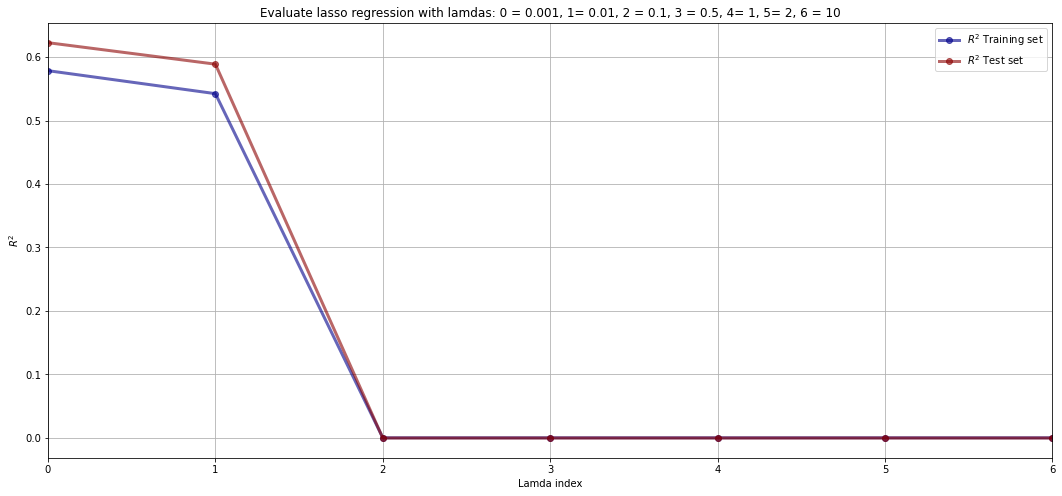

In [35]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [36]:
df_lamda = pd.DataFrame(test_r_squared, columns=['R_squared'])
df_lamda['lamda'] = (lamdas)
# returns the index of the row where column has maximum value.
df_lamda.loc[df_lamda['R_squared'].idxmax()]

R_squared    0.62288
lamda        0.00100
Name: 0, dtype: float64

In [37]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.001)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([ 0.001118  ,  0.        ,  0.00732842,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.00392726,  0.        ,  0.00987576, -0.00052464,
        0.        ,  0.0027608 ,  0.00934443,  0.00745098, -0.        ,
        0.00731386,  0.        , -0.00282766,  0.02703257,  0.02303842])

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test), )

0.0029256201479005693

## Cross-Validation for Best Alpha (or Lamda) Value


In [39]:
l_min = 0.001
l_max = 0.05
l_num = 50
lambdas = np.linspace(l_min, l_max, l_num)
print(lambdas)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05 ]


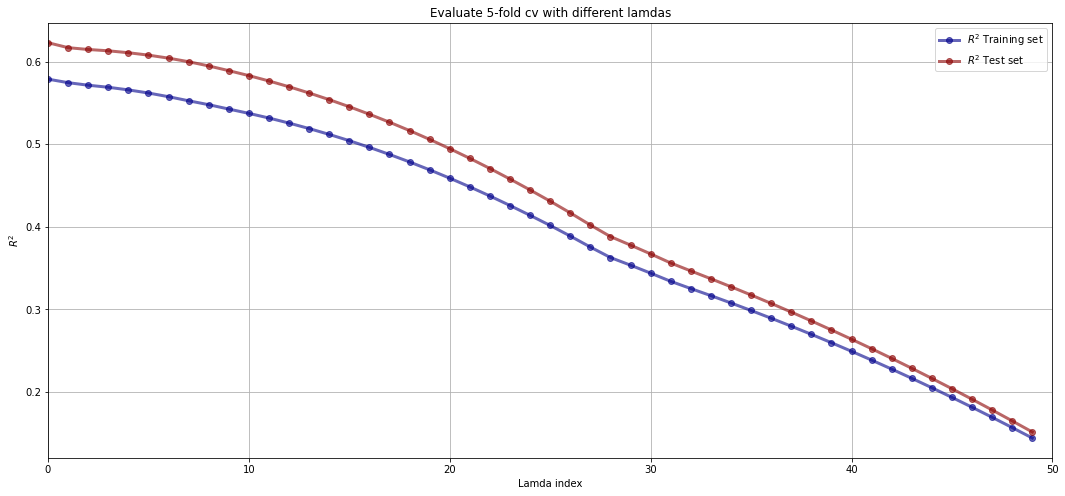

In [40]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 50)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

## Determine Best Model


In this section, the R^2 value, model coefficients, and RMSE of the best fit lasso regression model with the optimal alpha/lamda value will be computed.

In [41]:
df_lam = pd.DataFrame(test_r_squared, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    0.62288
lambda       0.00100
Name: 0, dtype: float64

In [42]:
# Best Model
reg_best = Lasso(alpha = 0.001)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.001)

In [43]:
reg_best.coef_

array([ 0.001118  ,  0.        ,  0.00732842,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.00392726,  0.        ,  0.00987576, -0.00052464,
        0.        ,  0.0027608 ,  0.00934443,  0.00745098, -0.        ,
        0.00731386,  0.        , -0.00282766,  0.02703257,  0.02303842])

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg_best.predict(X_test), squared = False)

0.054089002097474206

## Data Visualizations of Best Lasso Model

Lastly, there are two data visualizations below: the first is a scatterplot comparing the predicted `Per_of_Salary_Cap` v.s. the actual `Per_of_Salary_Cap`, and the second is a plot showing the values of the coefficients of each predictor in the lasso regression model which indicates which variables are best at predicting `Per_of_Salary_Cap`. In the first plot, the points should ideally fall close to or on the black dashed line, which represents a one-to-one relationship between the predicted and actual `Per_of_Salary_Cap`. For the second plot, the blue dashed line at the x-axis represents where coefficients equal zero and thus make the predictor variable insignificant.

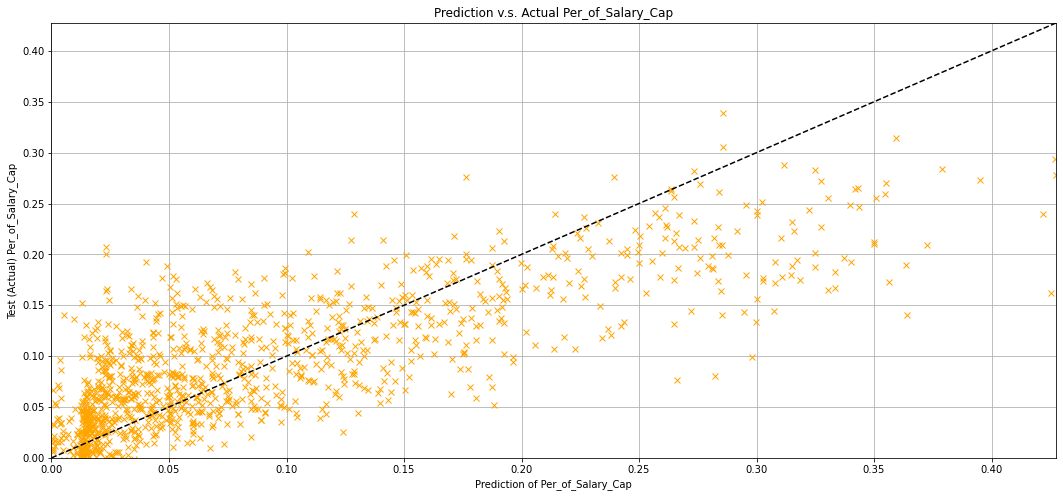

In [45]:
# Scatterplot of Predicted v.s. Actual Per_of_Salary_Cap

y_pred = reg_best.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(y_test, y_pred, "x", color = "orange")
lims = [0, max(np.max(y_test), np.max(y_pred))]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, linestyle = 'dashed', color = 'black')
plt.ylabel("Test (Actual) Per_of_Salary_Cap")
plt.xlabel("Prediction of Per_of_Salary_Cap")
plt.title("Prediction v.s. Actual Per_of_Salary_Cap")
plt.grid()
plt.show()

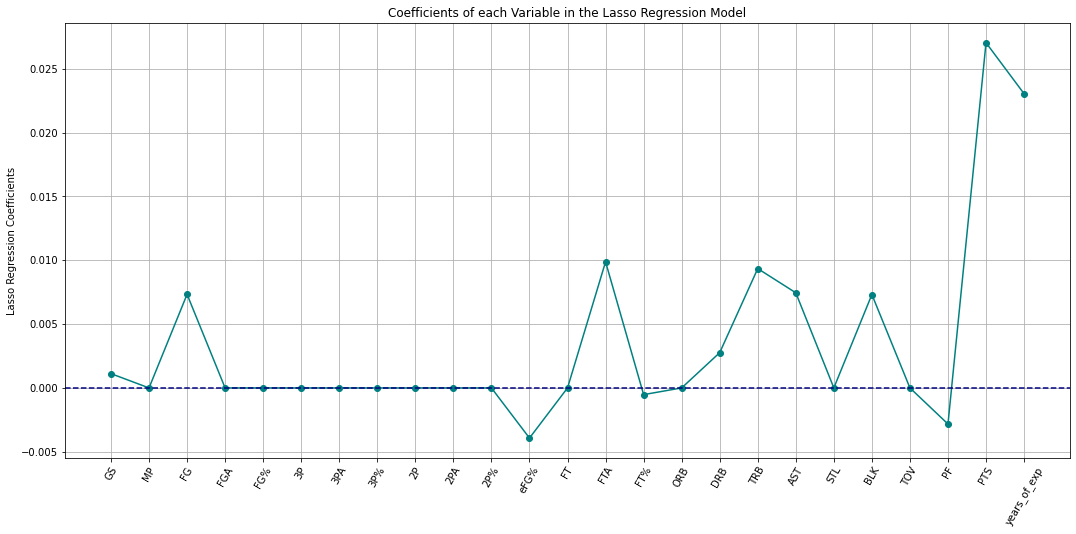

In [46]:
# Plot of Coefficients of Each Variable in the Lasso Regression Model for Veterans

plt.figure(figsize=(18, 8))
plt.plot(range(len(X.columns)), reg_best.coef_, 'bo-', color = "teal")
plt.axhline(y = 0, color = 'navy', linestyle='dashed')
plt.xticks(range(len(X.columns)), X.columns, rotation = 60)
plt.ylabel("Lasso Regression Coefficients")
plt.title("Coefficients of each Variable in the Lasso Regression Model")
plt.grid()
plt.show()

## Final Results

**R^2** = 0.62288, **RMSE** = 0.054089

**Best Predictors:** `FG`, `FTA`, `AST`, `TRB`, `PTS`, `BLK`, `years_of_exp`